In [1]:
import torch
from torchvision.transforms import transforms

from PIL import Image
from matplotlib import pyplot as plt

from src.components.Net import Net

In [2]:
classes = ('apple', 'banana', 'orange')

In [3]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # Resize the images to (224, 224)
    transforms.ToTensor(),           # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

In [4]:
net = Net()
net.load_state_dict(torch.load("./fruit_identification_model.pth"))

<All keys matched successfully>

In [5]:
# inputImg = Image.open("./src/ref_imgs/test_imgs/apple0010.jpeg")
# inputImg = Image.open("./src/ref_imgs/test_imgs/banana0020.jpeg")
inputImg = Image.open("./src/ref_imgs/test_imgs/orange0014.jpeg")

tensor = transform(inputImg).unsqueeze_(0)

Prediction:  orange


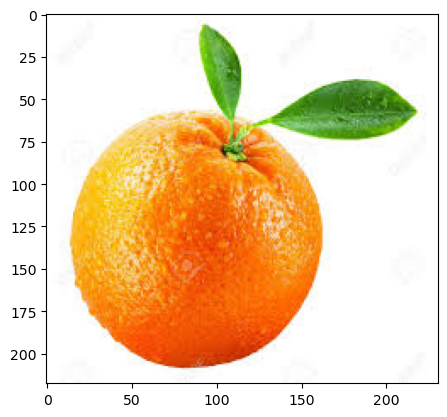

In [6]:
net.eval()

outputs = net(tensor)

_, predictions = torch.max(outputs.data, 1)

print("Prediction: ", classes[predictions[0]])

plt.imshow(inputImg)
plt.show()